###  Import necessary libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro
import numpy as np

### Load the Dataset

In [2]:
rice = pd.read_excel(r"C:\Users\ashfa\Desktop\rice final\rice new one.xlsx")
rice

,Year_New,Season,Sown (*000 Acres),Harvested (*000 Acres),GDP B$,Inflation(%),Rainfall(mm),Temperature(°C),Production (*000 Mt.)
0,1950,Yala,389.000,362.000,0.869,6.95,768,29.32,167
1,1950,Maha,710.000,678.000,0.857,2.27,1540,26.17,359
2,1951,Yala,402.000,386.000,0.692,3.85,749,28.43,176
3,1951,Maha,738.000,700.000,0.820,2.92,1347,27.49,385
4,1952,Yala,424.000,402.000,1.176,8.39,533,29.38,219
...,...,...,...,...,...,...,...,...,...
144,2022,Yala,1190.226,1186.806,74.140,49.72,410,29.15,1462
145,2022,Maha,2007.977,1996.280,79.250,33.13,1800,26.73,2696
146,2023,Yala,1248.067,1214.950,84.360,16.54,530,30.15,1817
147,2023,Maha,1993.329,1939.880,86.690,9.12,2270,26.61,2709


In [3]:
rice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year_New                 149 non-null    int64  
 1   Season                   149 non-null    object 
 2   Sown (*000  Acres)       149 non-null    float64
 3   Harvested (*000  Acres)  149 non-null    float64
 4   GDP B$                   149 non-null    float64
 5   Inflation(%)             149 non-null    float64
 6   Rainfall(mm)             149 non-null    int64  
 7   Temperature(°C)          149 non-null    float64
 8   Production (*000  Mt.)   149 non-null    int64  
dtypes: float64(5), int64(3), object(1)
memory usage: 10.6+ KB


In [4]:
rice.isnull().sum()

Year_New                   0
Season                     0
Sown (*000  Acres)         0
Harvested (*000  Acres)    0
GDP B$                     0
Inflation(%)               0
Rainfall(mm)               0
Temperature(°C)            0
Production (*000  Mt.)     0
dtype: int64

In [5]:
#Summary of the dataset
rice.describe()

,Year_New,Sown (*000 Acres),Harvested (*000 Acres),GDP B$,Inflation(%),Rainfall(mm),Temperature(°C),Production (*000 Mt.)
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,1986.751678,1025.882329,971.636940,32.397356,8.325168,1093.530201,27.061342,1171.167785
std,21.579804,404.363853,392.128673,119.727984,6.711841,633.111755,1.286175,732.832651
min,1950.000000,354.000000,328.000000,0.489000,-1.540000,385.000000,24.480000,167.000000
25%,1968.000000,684.000000,661.000000,1.970000,3.870000,477.000000,26.320000,534.000000
50%,1987.000000,948.000000,888.000000,6.830000,7.010000,894.000000,26.760000,1049.000000
75%,2005.000000,1329.000000,1250.000000,28.280000,11.380000,1730.000000,27.350000,1671.000000
max,2024.000000,2007.977000,1996.280000,1435.000000,49.720000,2470.000000,31.080000,3197.000000


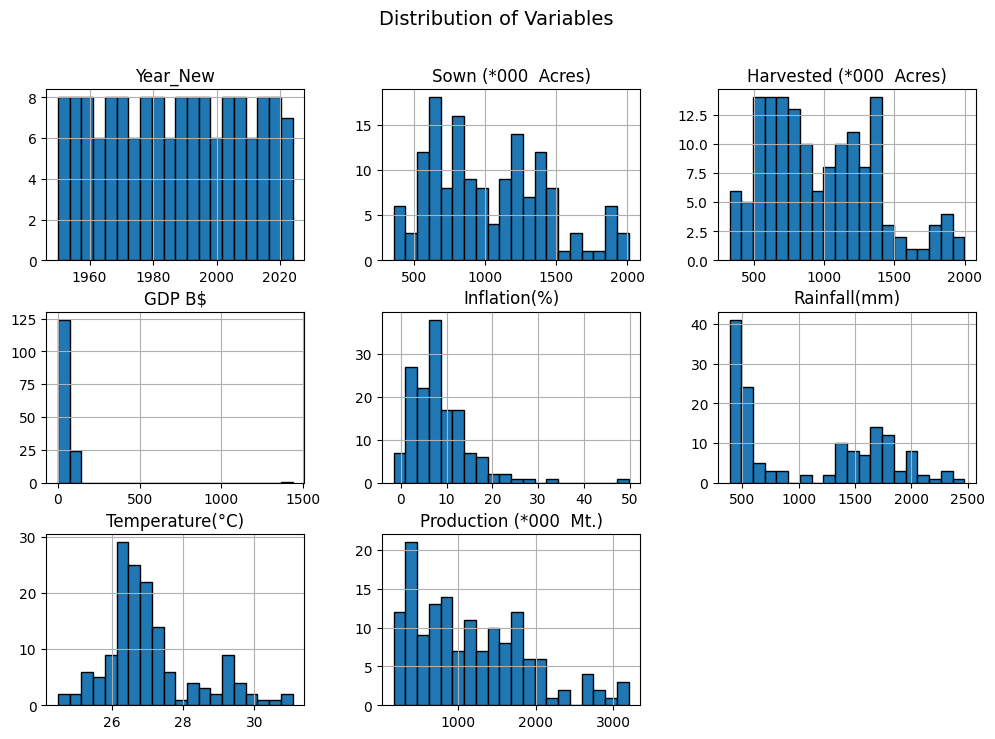

In [6]:
#Plot distributions of numerical veriables
rice.hist(bins=20, figsize=(12, 8), edgecolor='black')
plt.suptitle('Distribution of Variables', fontsize=14)
plt.show()

In [7]:
#Normality test for numerical columns
normality_p_values={}
for col in rice.select_dtypes(include=['float64', 'int64']).columns:
    stat, p_value=shapiro(rice[col])
    normality_p_values[col]=p_value
    print(f'{col}: p-value={p_value:.4f}')

Year_New: p-value=0.0001
Sown (*000  Acres): p-value=0.0001
Harvested (*000  Acres): p-value=0.0001
GDP B$: p-value=0.0000
Inflation(%): p-value=0.0000
Rainfall(mm): p-value=0.0000
Temperature(°C): p-value=0.0000
Production (*000  Mt.): p-value=0.0000


In [8]:
#Choosing the best correlation method
correlation_method= 'Spearman' if any(p < 0.05 for p in normality_p_values.values()) else 'Pearson'
print(f'\nUsing {correlation_method} correlation based on normality test.')


Using Spearman correlation based on normality test.


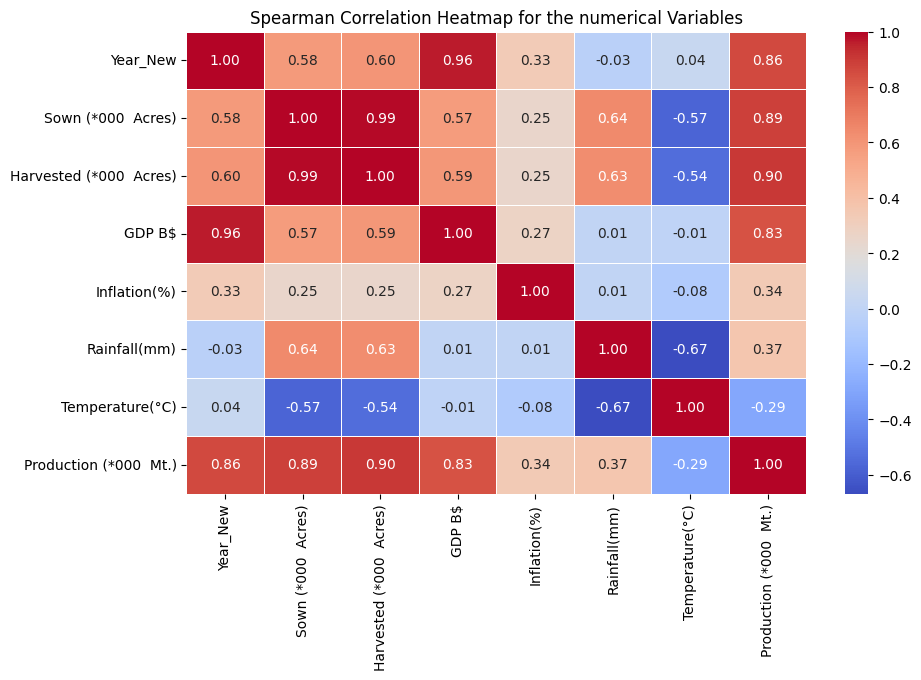

In [9]:
#Compute correlation matrix
df=rice.select_dtypes(include=['number'])

correlation_matrix=df.corr(method=correlation_method.lower())

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title(f'{correlation_method} Correlation Heatmap for the numerical Variables')
plt.show()

In [10]:
# Set correlation threshold values
strong_threshold=0.7 # Strong correlation (positve or negative)  
weak_threshold=0.2 # Weak correlation (near zero)

# Compute the correlation matrix
corr_matrix=df.corr(method=correlation_method.lower())

# Choose the target variable
target_variable= 'Production (*000  Mt.)'

# Extract the correlations with the target variable
corr_with_target=corr_matrix[target_variable].drop(target_variable)

# Identify strongly correlated features
strong_corr=corr_with_target[abs(corr_with_target) >= strong_threshold]

# Identify strongly correlated features
weak_corr=corr_with_target[abs(corr_with_target) < weak_threshold]


# Display results
print("\n🔹 Strongly Correlated Features (|r| ≥ 0.7):")
print(strong_corr.sort_values(ascending=False))

print("\n🔹 Weakly Correlated Features (|r| < 0.2):")
print(weak_corr.sort_values(ascending=False))


🔹 Strongly Correlated Features (|r| ≥ 0.7):
Harvested (*000  Acres)    0.904482
Sown (*000  Acres)         0.887281
Year_New                   0.858844
GDP B$                     0.834953
Name: Production (*000  Mt.), dtype: float64

🔹 Weakly Correlated Features (|r| < 0.2):
Series([], Name: Production (*000  Mt.), dtype: float64)


## Time Series

### Seasonal Plot (Yala + Maha)

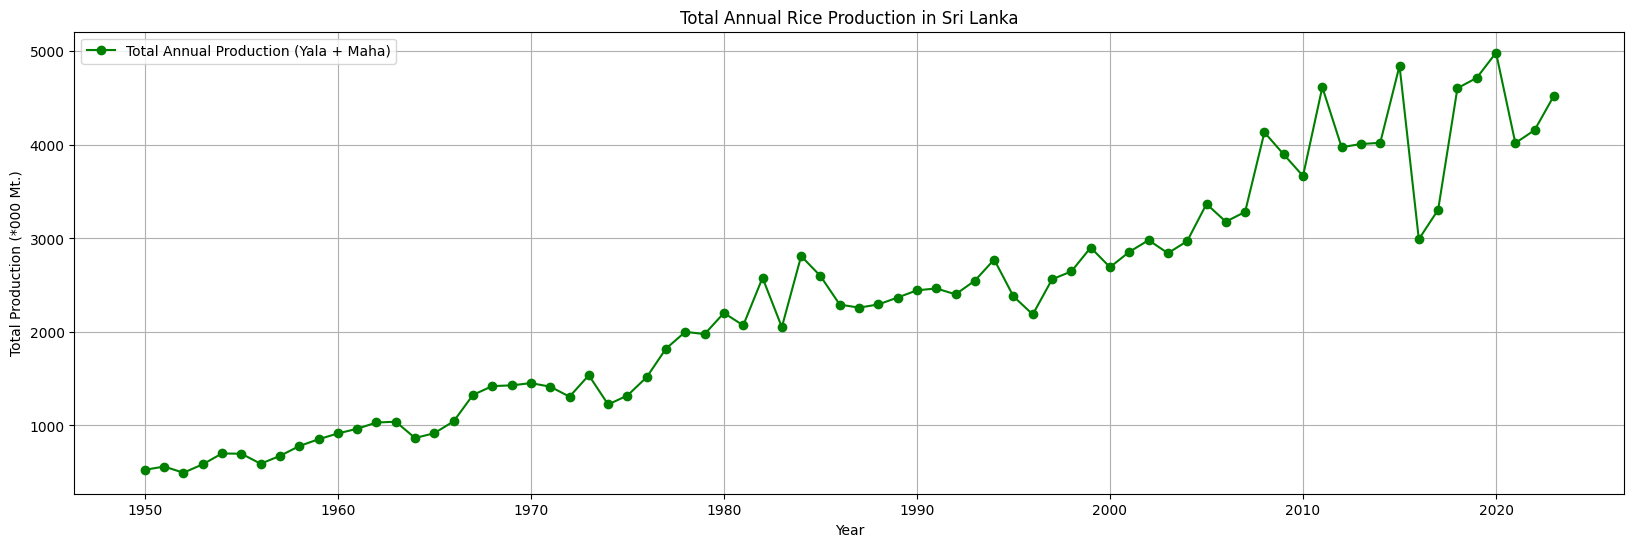

In [11]:
# Pivot table remains the same
seasonal = rice.pivot_table(values='Production (*000  Mt.)', index='Year_New', columns='Season', aggfunc='sum')

# Create a new column for total annual production
seasonal['Total_Production'] = seasonal['Yala'] + seasonal['Maha']

# Plot only the total production
plt.figure(figsize=(20,6))
plt.plot(seasonal.index, seasonal['Total_Production'], label='Total Annual Production (Yala + Maha)', color='green', marker='o')
plt.title('Total Annual Rice Production in Sri Lanka')
plt.xlabel('Year')
plt.ylabel('Total Production (*000 Mt.)')
plt.legend()
plt.grid(True)
plt.show()

### Seasonal plot separately for Yala & Maha

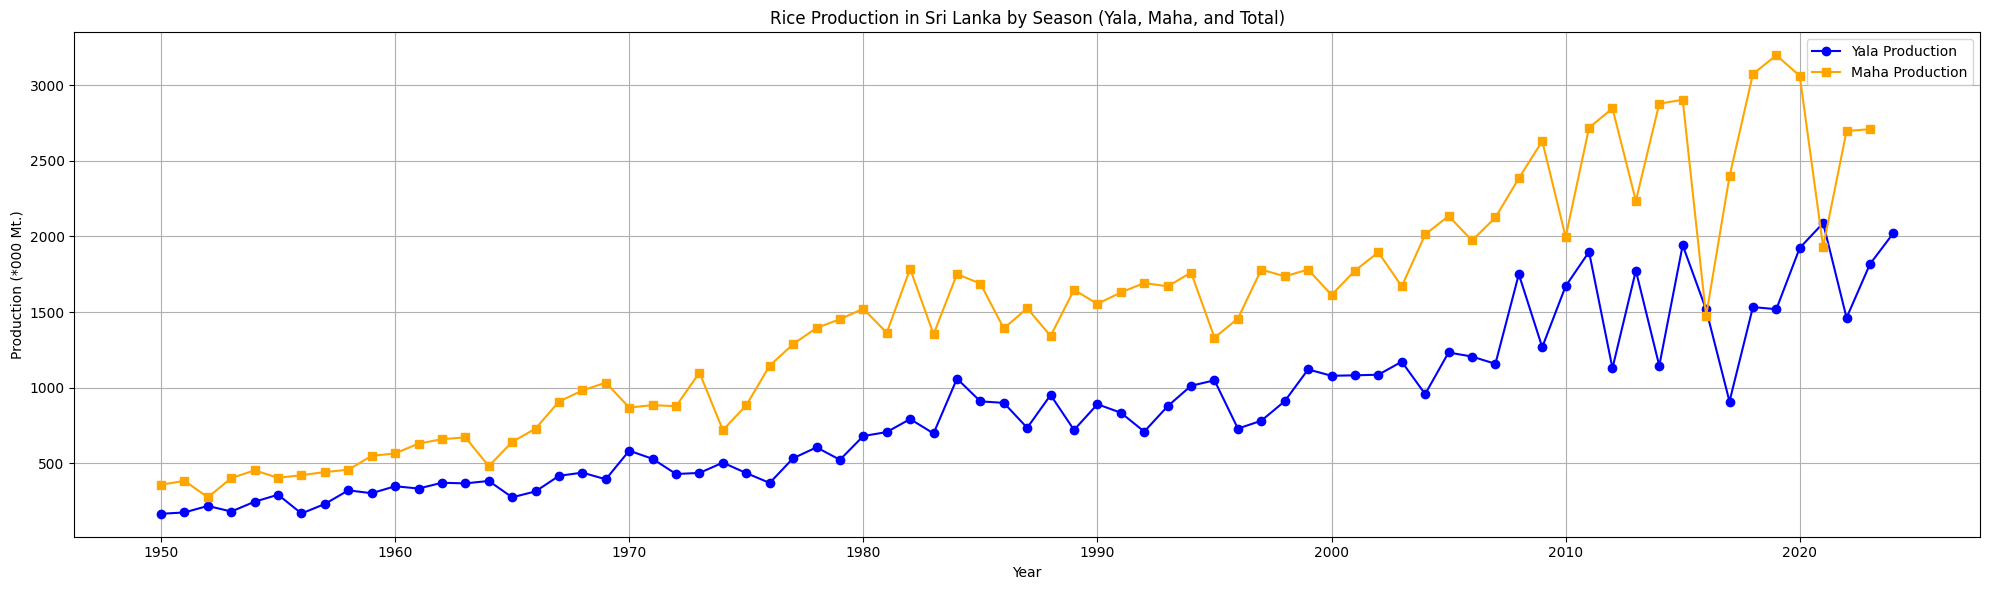

In [12]:
import matplotlib.pyplot as plt

# Create a new column for total annual production
seasonal['Total_Production'] = seasonal['Yala'] + seasonal['Maha']

# Plot Yala, Maha, and Total production
plt.figure(figsize=(20, 6))
plt.plot(seasonal.index, seasonal['Yala'], label='Yala Production', color='blue', marker='o')
plt.plot(seasonal.index, seasonal['Maha'], label='Maha Production', color='orange', marker='s')

# Customize the plot
plt.title('Rice Production in Sri Lanka by Season (Yala, Maha, and Total)')
plt.xlabel('Year')
plt.ylabel('Production (*000 Mt.)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Rolling Mean Average plot of Yala & Maha Seasons

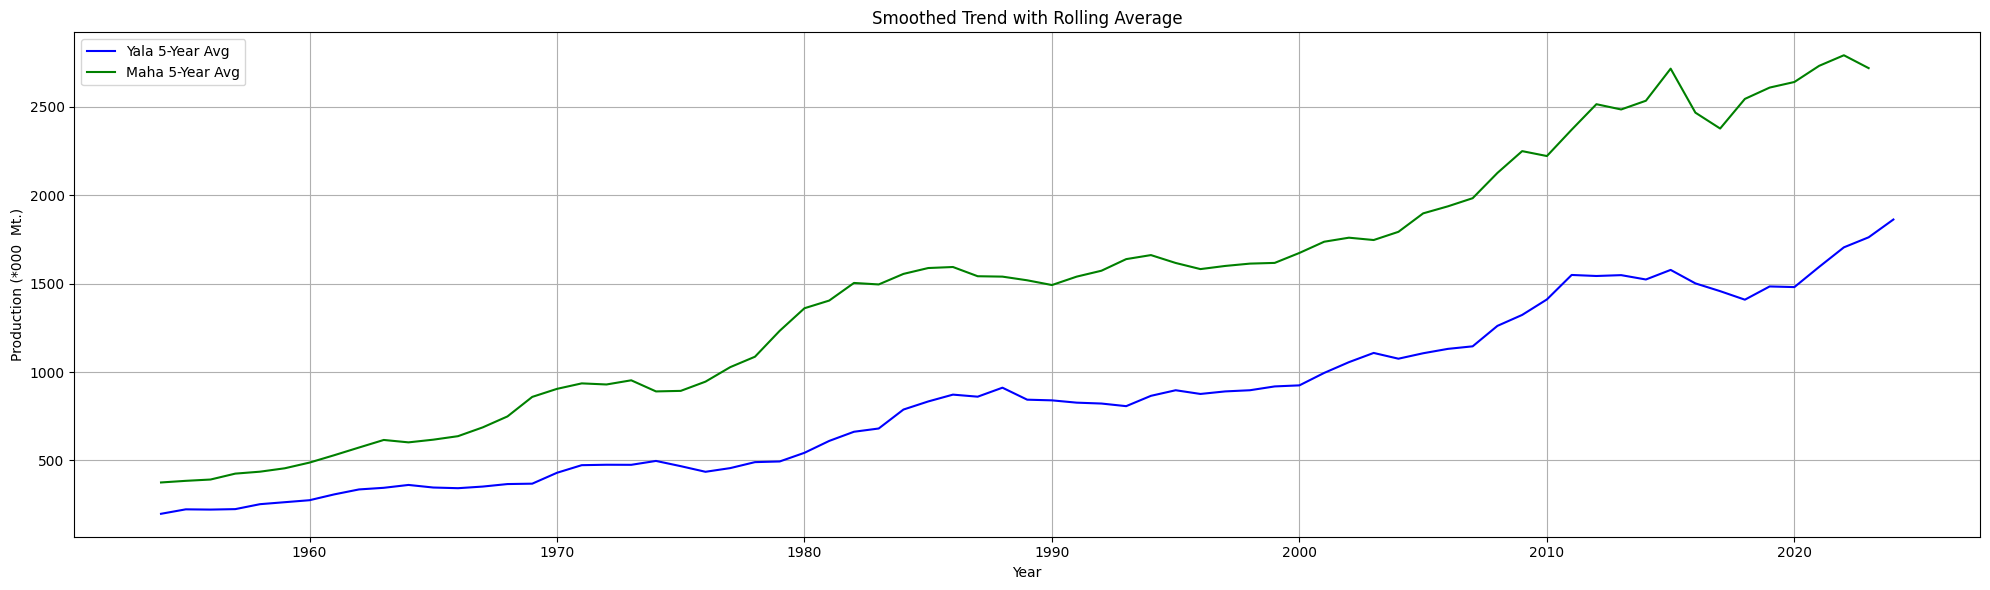

In [13]:
# --- 2. Rolling Average Plot (Trend) ---
rolling_window = 5 

plt.figure(figsize=(20, 6))
plt.plot(seasonal['Yala'].rolling(window=rolling_window).mean(), label=f'Yala {rolling_window}-Year Avg', color='blue')
plt.plot(seasonal['Maha'].rolling(window=rolling_window).mean(), label=f'Maha {rolling_window}-Year Avg', color='green')
plt.title('Smoothed Trend with Rolling Average')
plt.xlabel('Year')
plt.ylabel('Production (*000  Mt.)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Annual averages (Yala + Maha): Rainfall, Harvested acres, and Production over time

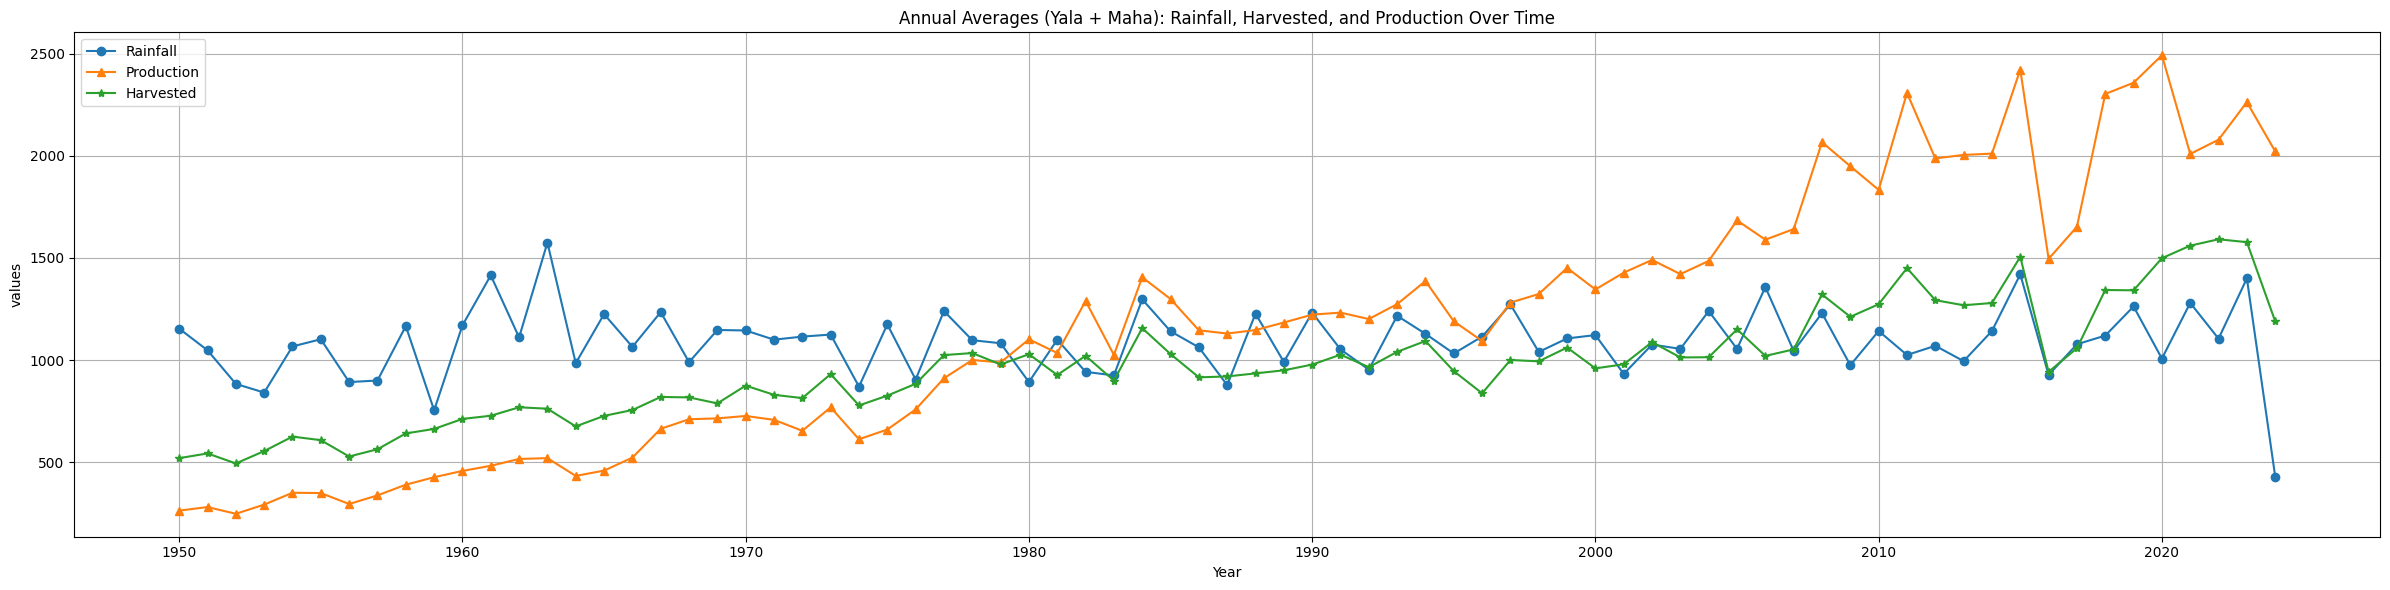

In [14]:
# Group data for all seasons by year and compute mean values
rice = rice.groupby("Year_New")[["Rainfall(mm)", "Production (*000  Mt.)", 'Harvested (*000  Acres)']].mean().reset_index()


# Plotting
plt.figure(figsize=(24, 6))
plt.plot(rice["Year_New"], rice["Rainfall(mm)"], label="Rainfall", marker='o')
plt.plot(rice["Year_New"], rice["Production (*000  Mt.)"], label="Production", marker='^')
plt.plot(rice["Year_New"], rice["Harvested (*000  Acres)"], label="Harvested", marker='*')
plt.title("Annual Averages (Yala + Maha): Rainfall, Harvested, and Production Over Time")
plt.xlabel("Year")
plt.ylabel("values")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Stationarity check before log-transformation

In [69]:
from statsmodels.tsa.stattools import adfuller

# Augmented Dickey-Fuller test on differenced series
adf_result = adfuller(rice['Production (*000  Mt.)'])

# Output results
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])

ADF Statistic: -0.5605203613523394
p-value: 0.879655633717813


### Applying log transformation

In [15]:
rice['log_production']=np.log(rice['Production (*000  Mt.)'])
rice['log_rain']=np.log(rice['Rainfall(mm)'])
rice['log_harvested']=np.log(rice['Harvested (*000  Acres)'])

### Check p-value to make sure the data is stationary

In [16]:
from statsmodels.tsa.stattools import adfuller

# Augmented Dickey-Fuller test on differenced series
adf_result = adfuller(rice['log_production'])

# Output results
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])

ADF Statistic: -2.2782633547734594
p-value: 0.1790743275856005


### ACF & PACF plots after log-transformation

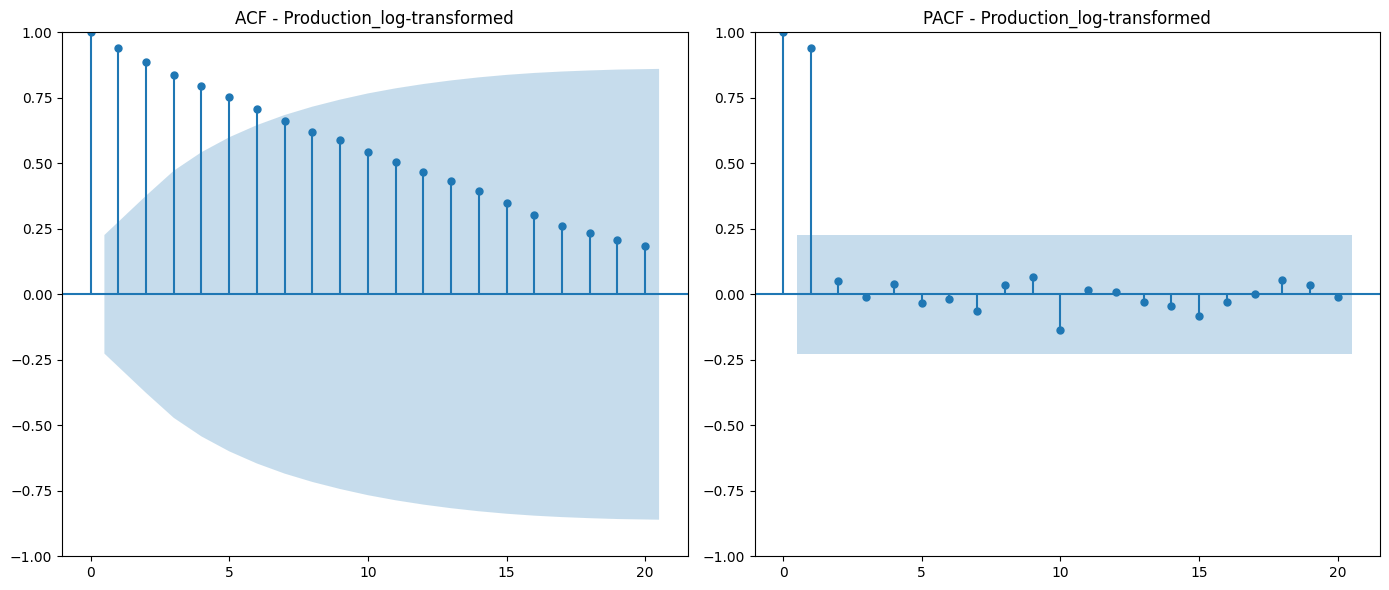

In [17]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Plot ACF and PACF
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plot_acf(rice['log_production'], lags=20, ax=plt.gca(), title='ACF - Production_log-transformed')

plt.subplot(1, 2, 2)
plot_pacf(rice['log_production'], lags=20, ax=plt.gca(), title='PACF - Production_log-transformed', method='ywm')

plt.tight_layout()
plt.show()

### Differencing

In [18]:
diff1=rice['log_production'].diff().dropna()

### Stationarity check using ADF test

In [19]:
from statsmodels.tsa.stattools import adfuller

# Augmented Dickey-Fuller test on differenced series
adf_result = adfuller(diff1)

# Output results
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])

ADF Statistic: -8.508876402754584
p-value: 1.182266626807716e-13


### Differenced time series plot

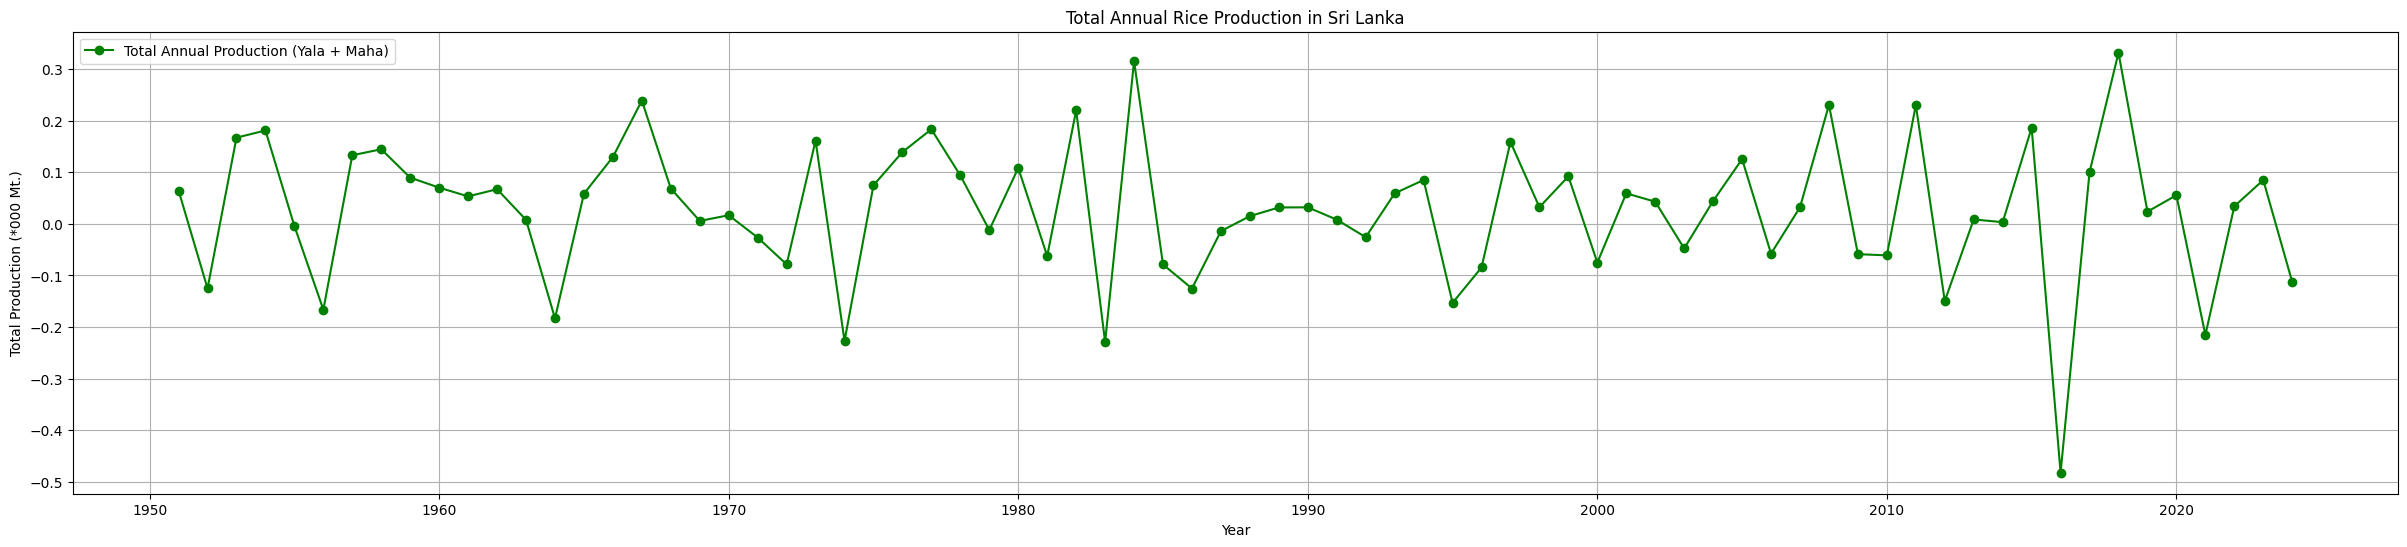

In [20]:
# Plot only the total production
plt.figure(figsize=(30,6))
plt.plot(rice["Year_New"].iloc[1:], diff1, label='Total Annual Production (Yala + Maha)', color='green', marker='o')
plt.title('Total Annual Rice Production in Sri Lanka')
plt.xlabel('Year')
plt.ylabel('Total Production (*000 Mt.)')
plt.legend()
plt.grid(True)
plt.show()

### ACF & PACF plots after 1st differencing

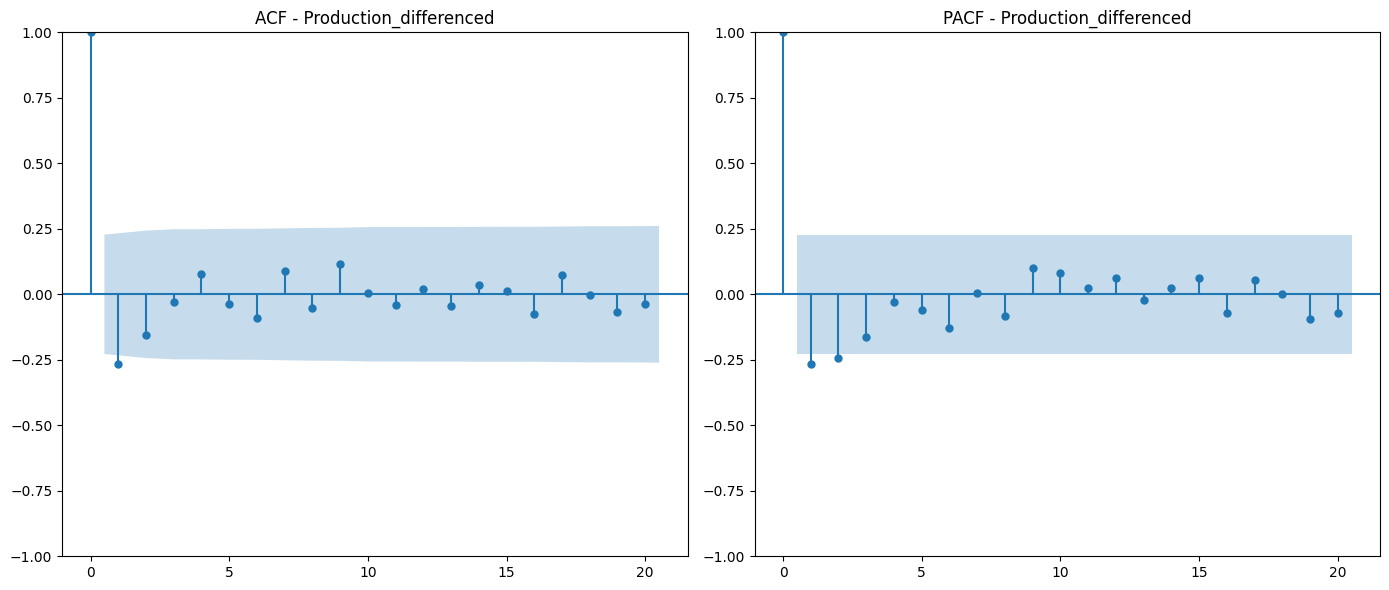

In [21]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Plot ACF and PACF
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plot_acf(diff1, lags=20, ax=plt.gca(), title='ACF - Production_differenced')

plt.subplot(1, 2, 2)
plot_pacf(diff1, lags=20, ax=plt.gca(), title='PACF - Production_differenced', method='ywm')

plt.tight_layout()
plt.show()

### Applying SARIMAX (1,1,1) (1,1,0,2)

                                     SARIMAX Results                                      
Dep. Variable:                     log_production   No. Observations:                   75
Model:             SARIMAX(1, 1, 1)x(1, 1, [], 2)   Log Likelihood                  85.733
Date:                            Sat, 14 Jun 2025   AIC                           -159.465
Time:                                    20:06:08   BIC                           -146.061
Sample:                                         0   HQIC                          -154.147
                                             - 75                                         
Covariance Type:                              opg                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
log_rain         -0.0799      0.033     -2.410      0.016      -0.145      -0.015
log_harvested     1.0819  

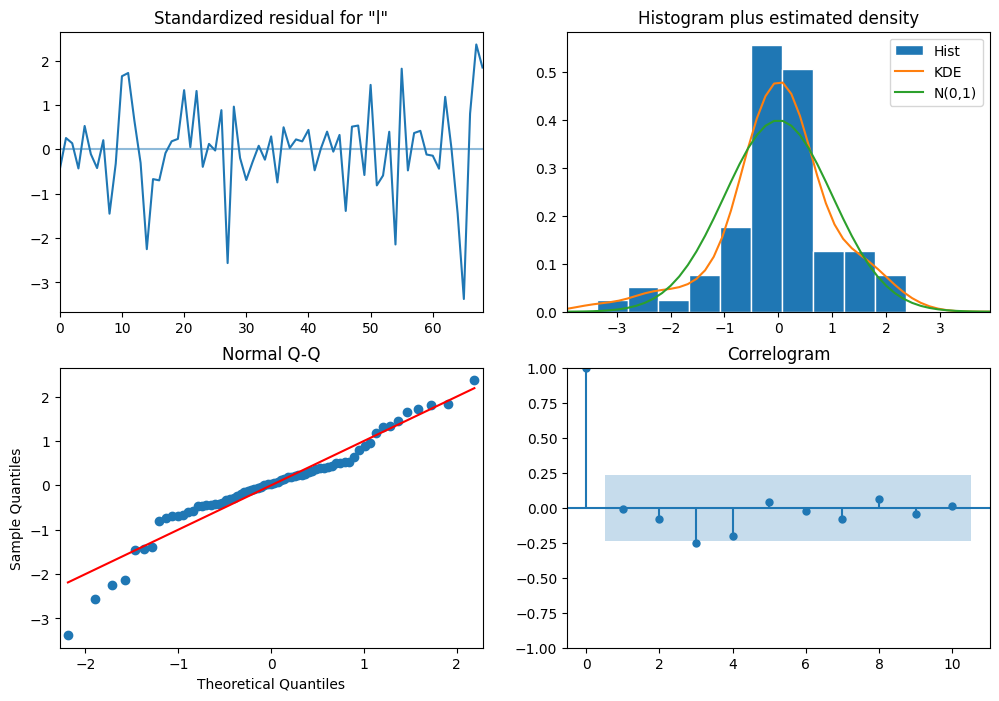

In [22]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# Define endogenous and exogenous variables
endog_1 = rice['log_production']
exog_1 = rice[['log_rain', 'log_harvested']]


# Fit SARIMAX model
model = SARIMAX(endog_1,
                exog=exog_1,
                order=(1, 1, 1),  # Non-seasonal (p,d,q)
                seasonal_order=(1, 1, 0, 2),  # Seasonal (P,D,Q,s) with s=2 for Maha/Yala
                enforce_stationarity=False,
                enforce_invertibility=False)

results_1 = model.fit()

# Summary and diagnostics
print(results_1.summary())
results_1.plot_diagnostics(figsize=(12, 8))
plt.show()

In [23]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import numpy as np

# In-sample fitted values (log scale)
fitted_values_log = results_1.fittedvalues
actual_log = endog_1

# Transform back to original scale
fitted_values = np.exp(fitted_values_log)
actual = np.exp(actual_log)

# Calculate error metrics on the original scale
mse = mean_squared_error(actual, fitted_values)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(actual, fitted_values) * 100

print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAPE: {mape:.2f}%")

MSE: 13143.5962
RMSE: 114.6455
MAPE: 6.67%


### Actual vs Fitted Production line plot of the best model

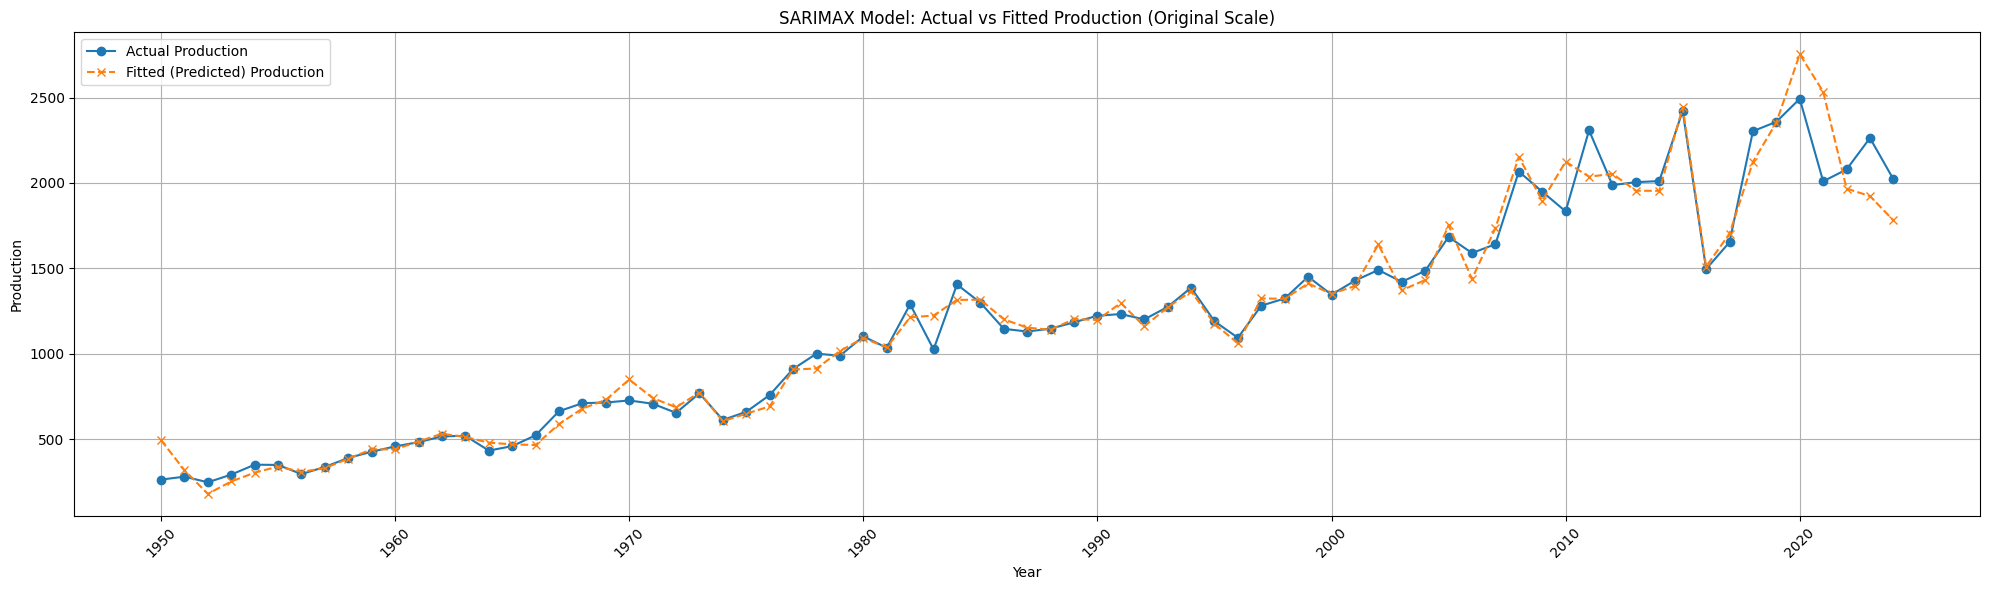

In [24]:
# Plot actual vs fitted values
plt.figure(figsize=(20, 6))
plt.plot(rice['Year_New'], actual, label='Actual Production', marker='o')
plt.plot(rice['Year_New'], fitted_values, label='Fitted (Predicted) Production', linestyle='--', marker='x')
plt.title('SARIMAX Model: Actual vs Fitted Production (Original Scale)')
plt.xlabel('Year')
plt.ylabel('Production')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [25]:
import pandas as pd

# Create a PeriodIndex from 1950 Maha to 2024 Yala (i.e., semiannual)
periods = len(rice)
rice.index = pd.period_range(start='1987Q1', periods=periods, freq='2Q')

In [64]:
# Forecast 4 steps ahead
n_steps = 4

# Generate future exogenous variables (here, just copying last row or using your actual future exog if available)
last_exog = exog_1.iloc[-1:]
future_exog = pd.concat([last_exog]*n_steps, ignore_index=True)

# Forecast
forecast_result = results_1.get_forecast(steps=n_steps, exog=future_exog)
forecast_mean = forecast_result.predicted_mean
conf_int = forecast_result.conf_int()

In [65]:
# Continue PeriodIndex
forecast_index = pd.period_range(start=rice.index[-1] + 1, periods=n_steps, freq='2Q')

# Assign index to forecast
forecast_mean.index = forecast_index
conf_int.index = forecast_index

### Forecasted plot of production for the best model

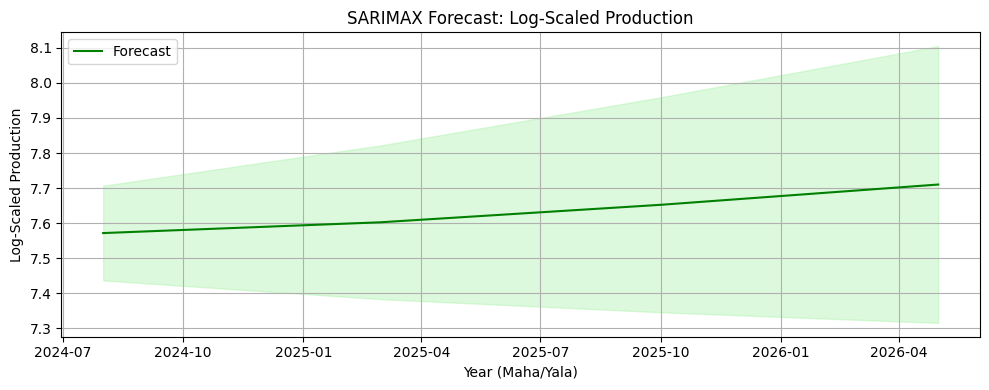

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Generate custom forecast index: 6 steps, 7-month gaps from last timestamp
start_date = rice.index.to_timestamp()[-1] + pd.DateOffset(months=7)
forecast_dates = [start_date + pd.DateOffset(months=7 * i) for i in range(4)]
forecast_index = pd.DatetimeIndex(forecast_dates)

# Reassign forecast index
forecast_mean.index = forecast_index
conf_int.index = forecast_index

# Plot
plt.figure(figsize=(10, 4))
plt.plot(forecast_mean.index, forecast_mean, label='Forecast', color='green')
plt.fill_between(forecast_mean.index,
                 conf_int.iloc[:, 0],
                 conf_int.iloc[:, 1],
                 color='lightgreen', alpha=0.3)

plt.title('SARIMAX Forecast: Log-Scaled Production')
plt.xlabel('Year (Maha/Yala)')
plt.ylabel('Log-Scaled Production')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [67]:
import numpy as np
import pandas as pd

# Exponentiate forecast to return to original production scale
predicted_production = pd.Series(np.exp(forecast_mean.values), index=forecast_mean.index)

# Round and print
print("Forecasted Production Values (Original Scale):")
print(predicted_production.round(2))

Forecasted Production Values (Original Scale):
2024-08-01    1942.53
2025-03-01    2003.28
2025-10-01    2105.59
2026-05-01    2230.89
dtype: float64


### Actual vs Fitted & Forecasted plot for the best model

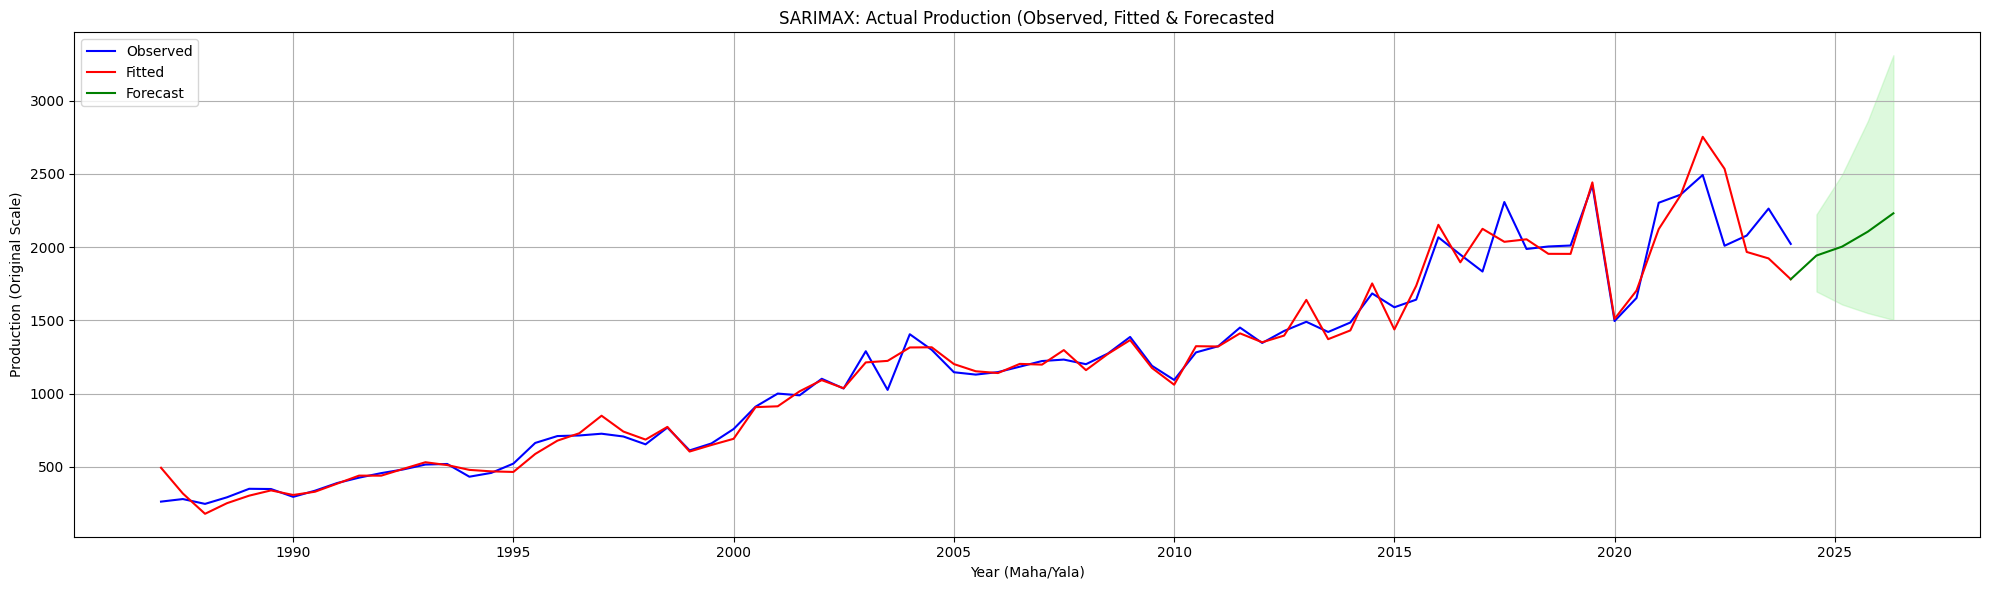

In [68]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Step 1: Create custom 7-month-gap forecast index
start_date = rice.index.to_timestamp()[-1] + pd.DateOffset(months=7)
forecast_dates = [start_date + pd.DateOffset(months=7 * i) for i in range(4)]
forecast_index = pd.DatetimeIndex(forecast_dates)

# Step 2: Assign this index to forecast
forecast_mean.index = forecast_index
conf_int.index = forecast_index

# Step 3: Exponentiate values to return to original scale
last_fitted_index = rice.index.to_timestamp()[-1]
last_fitted_value = np.exp(results_1.fittedvalues.iloc[-1])
forecast_series = pd.Series(np.exp(forecast_mean.values), index=forecast_index)
extended_forecast_values = pd.concat([
    pd.Series([last_fitted_value], index=[last_fitted_index]),
    forecast_series
])

observed_values = np.exp(endog_1)
fitted_values = np.exp(results_1.fittedvalues)
conf_int_exp = np.exp(conf_int)
conf_int_exp.index = forecast_index

# Step 4: Plot all components
plt.figure(figsize=(20, 6))

# Observed values
plt.plot(rice.index.to_timestamp(), observed_values, label='Observed', color='blue')

# Fitted values
plt.plot(rice.index.to_timestamp(), fitted_values, label='Fitted', color='red')

# Forecast
plt.plot(extended_forecast_values.index, extended_forecast_values, label='Forecast', color='green')

# Confidence interval
plt.fill_between(conf_int_exp.index,
                 conf_int_exp.iloc[:, 0],
                 conf_int_exp.iloc[:, 1],
                 color='lightgreen', alpha=0.3)

# Final touches
plt.title('SARIMAX: Actual Production (Observed, Fitted & Forecasted')
plt.xlabel('Year (Maha/Yala)')
plt.ylabel('Production (Original Scale)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### SARIMAX (0,1,1) (0,1,1,2)

                                     SARIMAX Results                                     
Dep. Variable:                    log_production   No. Observations:                   75
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 2)   Log Likelihood                  91.963
Date:                           Sat, 14 Jun 2025   AIC                           -173.927
Time:                                   20:09:20   BIC                           -162.829
Sample:                               03-31-1987   HQIC                          -169.530
                                    - 03-31-2024                                         
Covariance Type:                             opg                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
log_rain         -0.0743      0.032     -2.351      0.019      -0.136      -0.012
log_harvested     1.0952      0.08

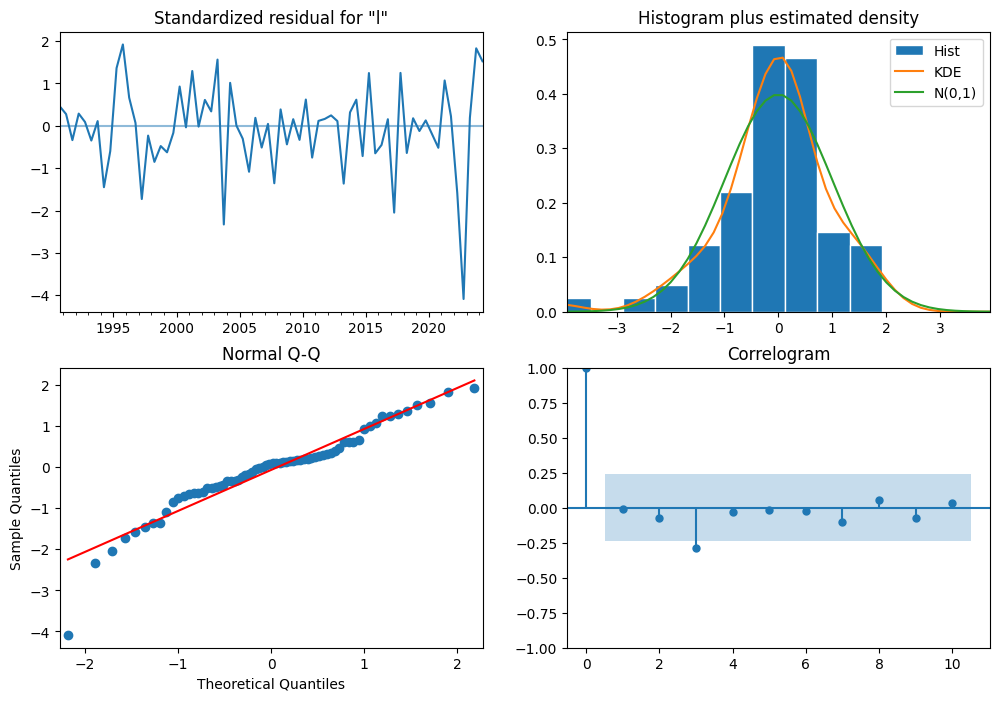

In [58]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# Define endogenous and exogenous variables
endog_t = rice['log_production']
exog_t = rice[['log_rain', 'log_harvested']]

# Fit SARIMAX model
model = SARIMAX(endog_t,
                exog=exog_t,
                order=(0, 1, 1),  # Non-seasonal (p,d,q)
                seasonal_order=(0, 1, 1, 2),  # Seasonal (P,D,Q,s) with s=2 for Maha/Yala
                enforce_stationarity=False,
                enforce_invertibility=False)

results_t = model.fit()

# Summary and diagnostics
print(results_t.summary())
results_t.plot_diagnostics(figsize=(12, 8))
plt.show()

In [59]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import numpy as np

# In-sample fitted values (log scale)
fitted_values_log = results_t.fittedvalues
actual_log = endog_t

# Transform back to original scale
fitted_values = np.exp(fitted_values_log)
actual = np.exp(actual_log)

# Calculate error metrics on the original scale
mse = mean_squared_error(actual, fitted_values)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(actual, fitted_values) * 100

print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAPE: {mape:.2f}%")

MSE: 11470.6143
RMSE: 107.1010
MAPE: 6.30%


### Apply SARIMAX only by taking the rainfall as the exogenous variable

                                     SARIMAX Results                                      
Dep. Variable:                     log_production   No. Observations:                   75
Model:             SARIMAX(0, 1, 1)x(1, 1, [], 2)   Log Likelihood                  34.461
Date:                            Sat, 14 Jun 2025   AIC                            -60.922
Time:                                    20:06:11   BIC                            -51.928
Sample:                                03-31-1987   HQIC                           -57.350
                                     - 03-31-2024                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
log_rain       0.2312      0.100      2.320      0.020       0.036       0.426
ma.L1         -0.4043      0.147   

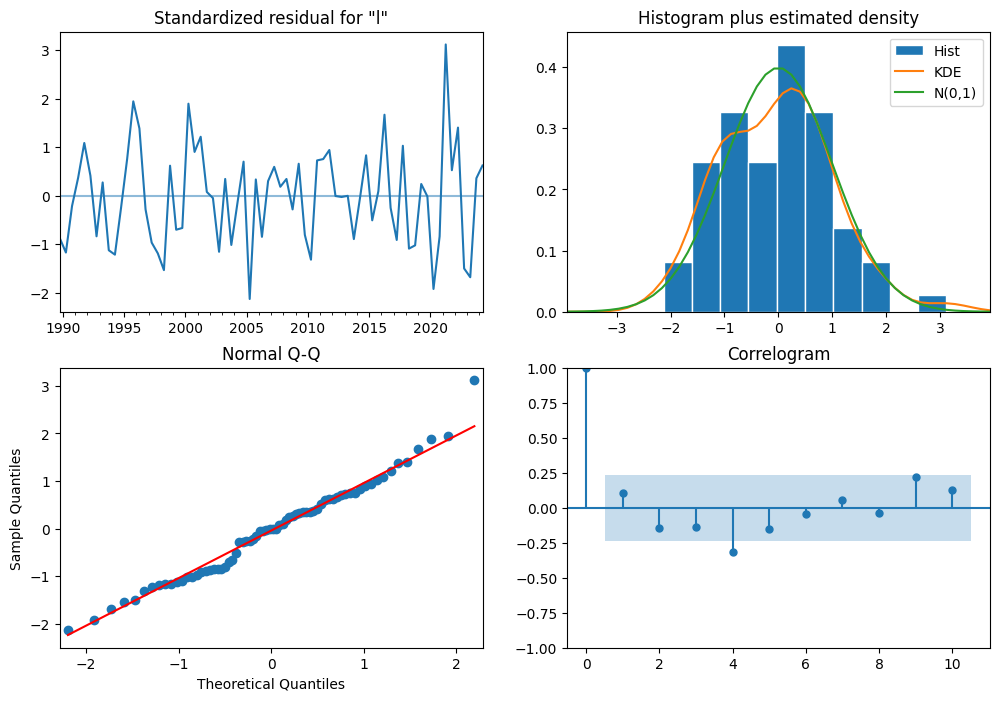

In [33]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# Define endogenous and exogenous variables
endog_r = rice['log_production']
exog_r = rice[['log_rain']]

# Fit SARIMAX model
model = SARIMAX(endog_r,
                exog=exog_r,
                order=(0, 1, 1),  # Non-seasonal (p,d,q)
                seasonal_order=(1, 1, 0, 2),  # Seasonal (P,D,Q,s) with s=2 for Maha/Yala
                enforce_stationarity=False,
                enforce_invertibility=False)

results_r = model.fit()

# Summary and diagnostics
print(results_r.summary())
results_r.plot_diagnostics(figsize=(12, 8))
plt.show()

In [34]:
# In-sample fitted values (log scale)
fitted_values_log = results_r.fittedvalues
actual_log = endog_r

# Transform back to original scale
fitted_values = np.exp(fitted_values_log)
actual = np.exp(actual_log)

# Calculate error metrics on the original scale
mse = mean_squared_error(actual, fitted_values)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(actual, fitted_values) * 100

print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAPE: {mape:.2f}%")

MSE: 77490.2601
RMSE: 278.3707
MAPE: 21.47%


### Applying SARIMA 

                                     SARIMAX Results                                      
Dep. Variable:                     log_production   No. Observations:                   75
Model:             SARIMAX(1, 1, 1)x(1, 1, [], 2)   Log Likelihood                  36.968
Date:                            Sat, 14 Jun 2025   AIC                            -65.936
Time:                                    20:06:12   BIC                            -56.999
Sample:                                03-31-1987   HQIC                           -62.390
                                     - 03-31-2024                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3885      0.163      2.387      0.017       0.070       0.707
ma.L1         -0.9723      0.086   

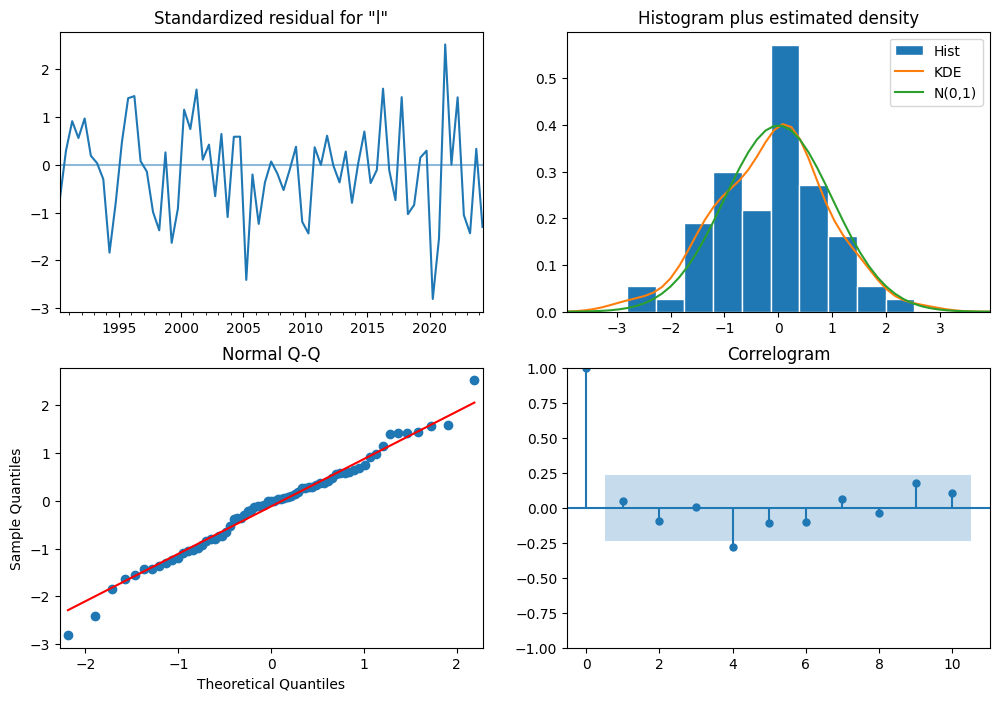

In [35]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# Define endogenous and exogenous variables
endog_2 = rice['log_production']


# Fit SARIMAX model
model = SARIMAX(endog_2,
                order=(1, 1, 1),  # Non-seasonal (p,d,q)
                seasonal_order=(1, 1, 0, 2),  # Seasonal (P,D,Q,s) with s=2 for Maha/Yala
                enforce_stationarity=False,
                enforce_invertibility=False)

results_2 = model.fit()

# Summary and diagnostics
print(results_2.summary())
results_2.plot_diagnostics(figsize=(12, 8))
plt.show()

In [36]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import numpy as np

# In-sample fitted values (log scale)
fitted_values_log = results_2.fittedvalues
actual_log = endog_2

# Transform back to original scale
fitted_values = np.exp(fitted_values_log)
actual = np.exp(actual_log)

# Calculate error metrics on the original scale
mse = mean_squared_error(actual, fitted_values)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(actual, fitted_values) * 100

print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAPE: {mape:.2f}%")

MSE: 354229.8846
RMSE: 595.1721
MAPE: 40.83%


### Among these 4 models, SARIMAX (1,1,1) (1,1,0,2) is the best performing model by considering rainfall and harvested acres as the exogenous variables